In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("tickets.csv")
df.head(2)

,ticket_id,client,service,logged_date,status,time_spent,assignee,logger
0,1000,B,C1,2024-10-10 05:27:00 UTC,awaiting_response,7,member4,user1
1,1001,A,B1,2024-03-21 02:05:00 UTC,closed,2,member3,user3


In [3]:
df.dtypes

ticket_id       int64
client         object
service        object
logged_date    object
status         object
time_spent      int64
assignee       object
logger         object
dtype: object

In [4]:
df['logged_date'] = pd.to_datetime(df['logged_date'], format="%Y-%m-%d %H:%M:%S UTC")
df.dtypes

ticket_id               int64
client                 object
service                object
logged_date    datetime64[ns]
status                 object
time_spent              int64
assignee               object
logger                 object
dtype: object

In [5]:
df = df.sort_values(by='logged_date').reset_index(drop=True)
df.head()

,ticket_id,client,service,logged_date,status,time_spent,assignee,logger
0,320557,D,A1,2024-01-01 00:00:00,assigned,8,member1,user1
1,130115,A,D1,2024-01-01 00:00:00,closed,2,member2,user2
2,10501,D,C1,2024-01-01 00:01:00,awaiting_response,6,member4,user4
3,195801,C,F1,2024-01-01 00:01:00,awaiting_response,3,member2,user3
4,744370,B,F1,2024-01-01 00:01:00,assigned,1,member1,user3


In [6]:
df.dtypes

ticket_id               int64
client                 object
service                object
logged_date    datetime64[ns]
status                 object
time_spent              int64
assignee               object
logger                 object
dtype: object

In [7]:
# Define the time frame
start_time = '2024-01-01 00:00:00 UTC'
end_time = '2024-06-30 00:00:00 UTC'

In [8]:
# Convert the frame strings to datetime
start_time = pd.to_datetime(start_time, format='%Y-%y-%d %H:%M:%S UTC')
end_time = pd.to_datetime(end_time, format='%Y-%m-%d %H:%M:%S UTC')

In [9]:
# Filter the dataframe for tickets within the time frame
filtered_df = df[(df['logged_date'] >= start_time) & (df['logged_date'] <= end_time)]
filtered_df.shape

(602891, 8)

In [10]:
num_tickets = filtered_df.shape[0]
print(f"Number of tickets logged between {start_time} & {end_time} : {num_tickets}")

Number of tickets logged between 2001-01-01 00:00:00 & 2024-06-30 00:00:00 : 602891


In [11]:
# Group by client and calcualte ticket count
ticket_share = filtered_df['client'].value_counts().reset_index()
ticket_share.columns = ['client', 'ticket_count']

In [12]:
# Calculate percentage
total_tickets = ticket_share['ticket_count'].sum()
ticket_share['percentage'] = (ticket_share['ticket_count'] / total_tickets * 100).round(2)

In [13]:
# Printing results
ticket_share

,client,ticket_count,percentage
0,D,121051,20.08
1,C,120735,20.03
2,A,120554,20.00
3,B,120462,19.98
4,E,120089,19.92


In [14]:
# Group tickets by 1 hour interval
filtered_df["hour"] = filtered_df['logged_date'].dt.floor('H')
hourly_trend = filtered_df.groupby("hour").size().reset_index(name='ticket_count')

C:\Users\kumar\AppData\Local\Temp\ipykernel_29640\3665309096.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  filtered_df["hour"] = filtered_df['logged_date'].dt.floor('H')
C:\Users\kumar\AppData\Local\Temp\ipykernel_29640\3665309096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["hour"] = filtered_df['logged_date'].dt.floor('H')


In [15]:
hourly_trend

,hour,ticket_count
0,2024-01-01 00:00:00,152
1,2024-01-01 01:00:00,138
2,2024-01-01 02:00:00,129
3,2024-01-01 03:00:00,119
4,2024-01-01 04:00:00,151
...,...,...
4340,2024-06-29 20:00:00,129
4341,2024-06-29 21:00:00,141
4342,2024-06-29 22:00:00,142
4343,2024-06-29 23:00:00,143


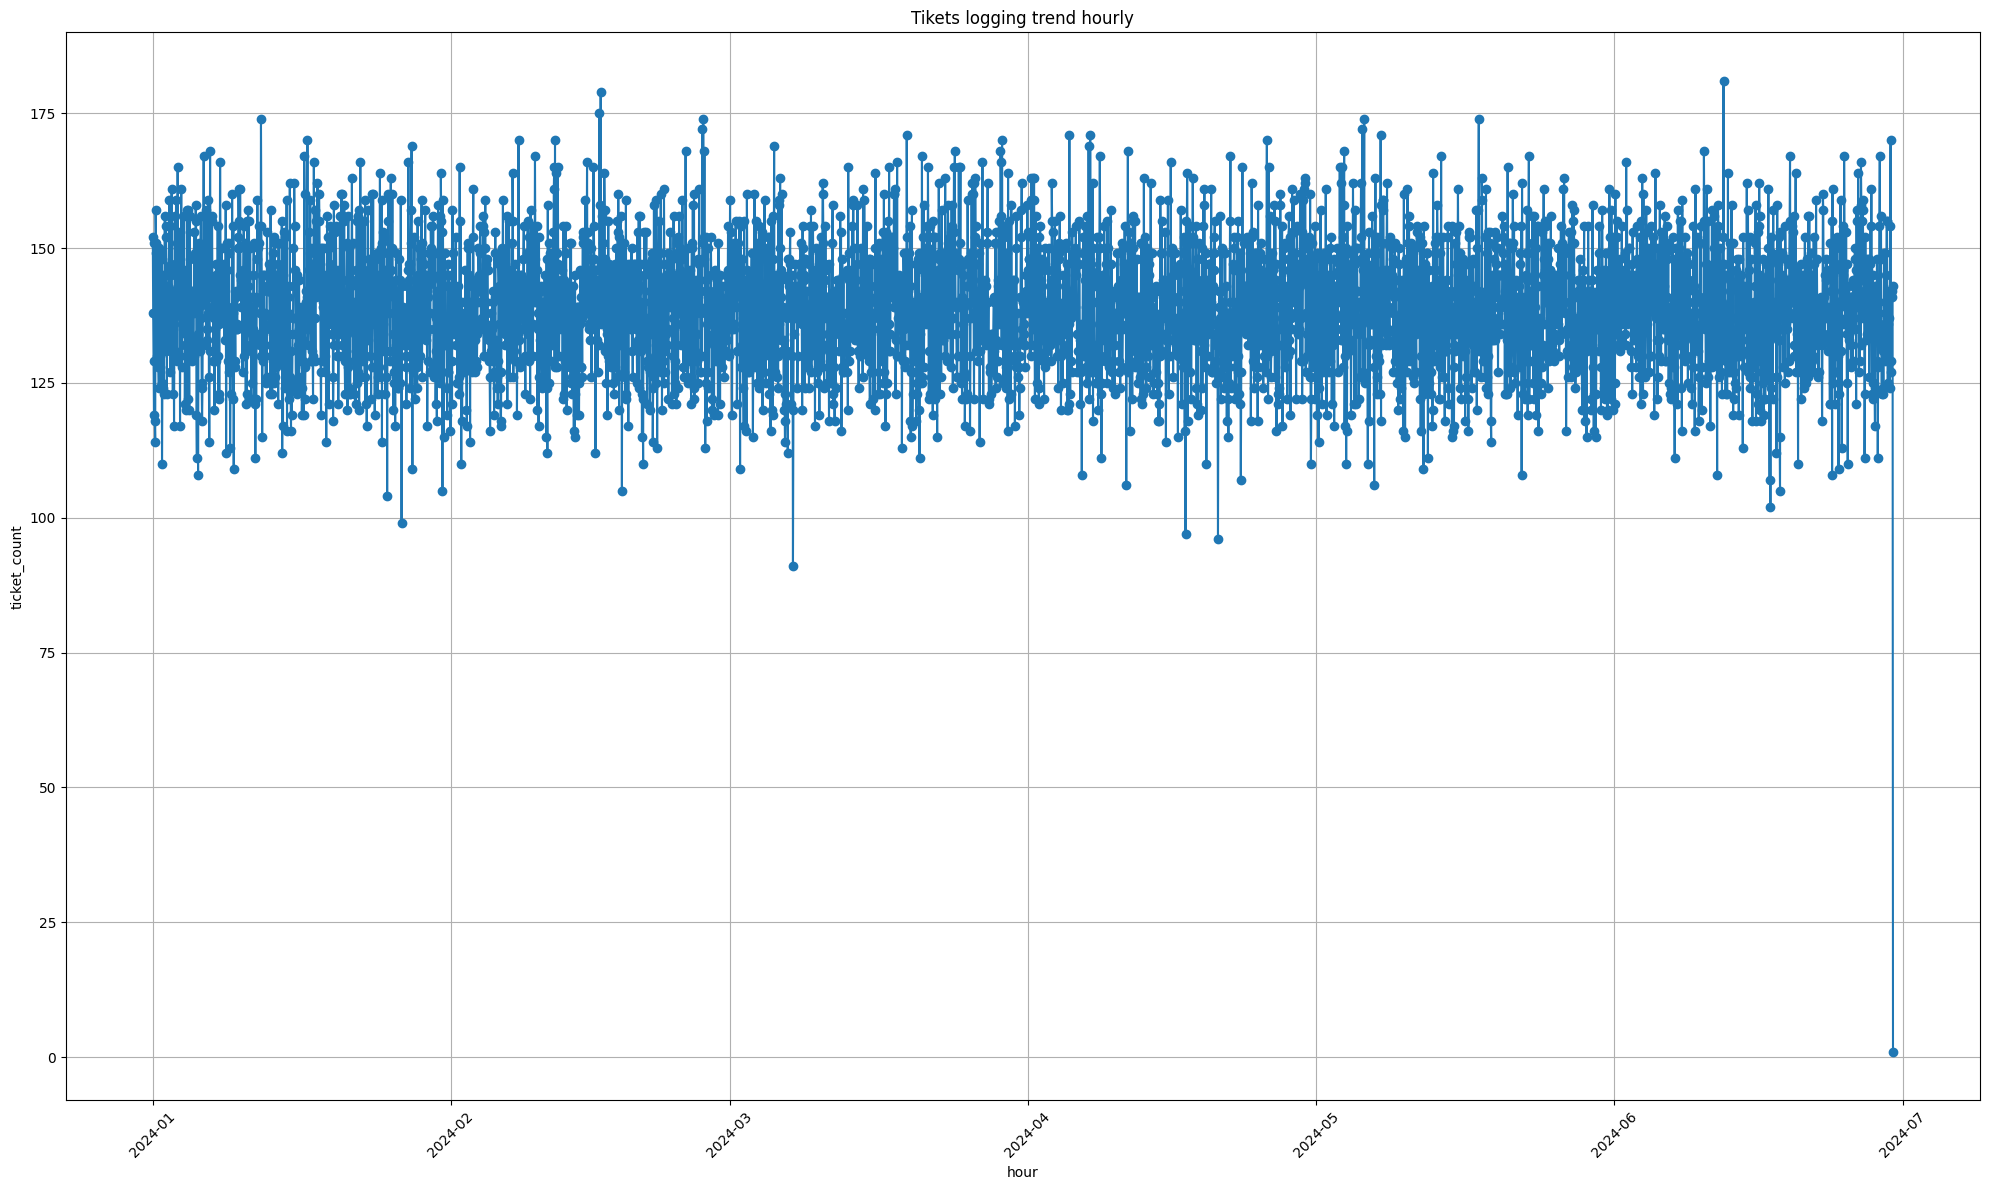

In [16]:
# Adjust the graph size accordingly
plt.figure(figsize=(20, 12))

# plot the graph
plt.plot(hourly_trend['hour'], hourly_trend['ticket_count'], marker='o')
plt.xlabel('hour')
plt.ylabel('ticket_count')
plt.title('Tikets logging trend hourly')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()